# HOUSE PRICE PREDICTION 

In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina' 
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae,mean_squared_error as mse
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor


import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb


In [2]:
#Read Dataset
train = pd.read_csv("HouseTrain.csv")
test = pd.read_csv("HouseTest.csv")
sub=pd.read_csv("Housesub.csv")

In [3]:

# Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

# # Now drop the 'Id' column since it's unnecessary for the prediction process.
# train.drop("Id", axis = 1, inplace = True)
# test.drop("Id", axis = 1, inplace = True)

# Check data size after dropping the 'Id' variable
print("\nThe train data size : {} ".format(train.shape)) 
print("The test data size  : {} ".format(test.shape))


The train data size : (1460, 81) 
The test data size  : (1459, 80) 


##  TRAIN DATASET INFORMATION EXTRACTION

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
def missing_zero_values_table(train):

        zero_val = (train == 0.00).astype(int).sum(axis=0)
        mis_val = train.isnull().sum()
        mis_val_percent = 100 * train.isnull().sum() / len(train)
        missing_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        missing_table = missing_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Missing Values'})
        missing_table['Data Type'] = train.dtypes
        missing_table = missing_table[
            missing_table.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(train.shape[1]) + " columns and " + str(train.shape[0]) + " Rows.\n"      
            "There are " + str(missing_table.shape[0]) +
              " columns that have missing values.")
        return missing_table

missing_zero_values_table(train)

Your selected dataframe has 81 columns and 1460 Rows.
There are 19 columns that have missing values.


,Zero Values,Missing Values,% of Missing Values,Data Type
PoolQC,0,1453,99.5,object
MiscFeature,0,1406,96.3,object
Alley,0,1369,93.8,object
Fence,0,1179,80.8,object
FireplaceQu,0,690,47.3,object
LotFrontage,0,259,17.7,float64
GarageType,0,81,5.5,object
GarageYrBlt,0,81,5.5,float64
GarageFinish,0,81,5.5,object
GarageQual,0,81,5.5,object


Most values of these columns are NA not 0 

In [7]:
# let's delete some columns from the dataset that has high percentage of missing value
train=train.drop(columns=["PoolQC","Fence","MiscFeature","Alley","FireplaceQu","LotFrontage"])
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


# TEST DATA INFORMATION EXTRACTION

In [8]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [10]:
missing_zero_values_table(test)

Your selected dataframe has 80 columns and 1459 Rows.
There are 33 columns that have missing values.


,Zero Values,Missing Values,% of Missing Values,Data Type
PoolQC,0,1456,99.8,object
MiscFeature,0,1408,96.5,object
Alley,0,1352,92.7,object
Fence,0,1169,80.1,object
FireplaceQu,0,730,50.0,object
LotFrontage,0,227,15.6,float64
GarageCond,0,78,5.3,object
GarageYrBlt,0,78,5.3,float64
GarageQual,0,78,5.3,object
GarageFinish,0,78,5.3,object


In [11]:
test=test.drop(columns=["PoolQC","Fence","MiscFeature","Alley","FireplaceQu","LotFrontage"])
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


# DATA VISUALIZATION

1-An Histogram plot to show the frequency distribution of the saleprice.
2-A box plot to view outliers and detect a sign of skewness
3-A probability plot used to compare 2 dataset , It may be refer as probability-probability (p-p) plot or Quantile-Quantile (q-q) which is used against the standard normal distribution.

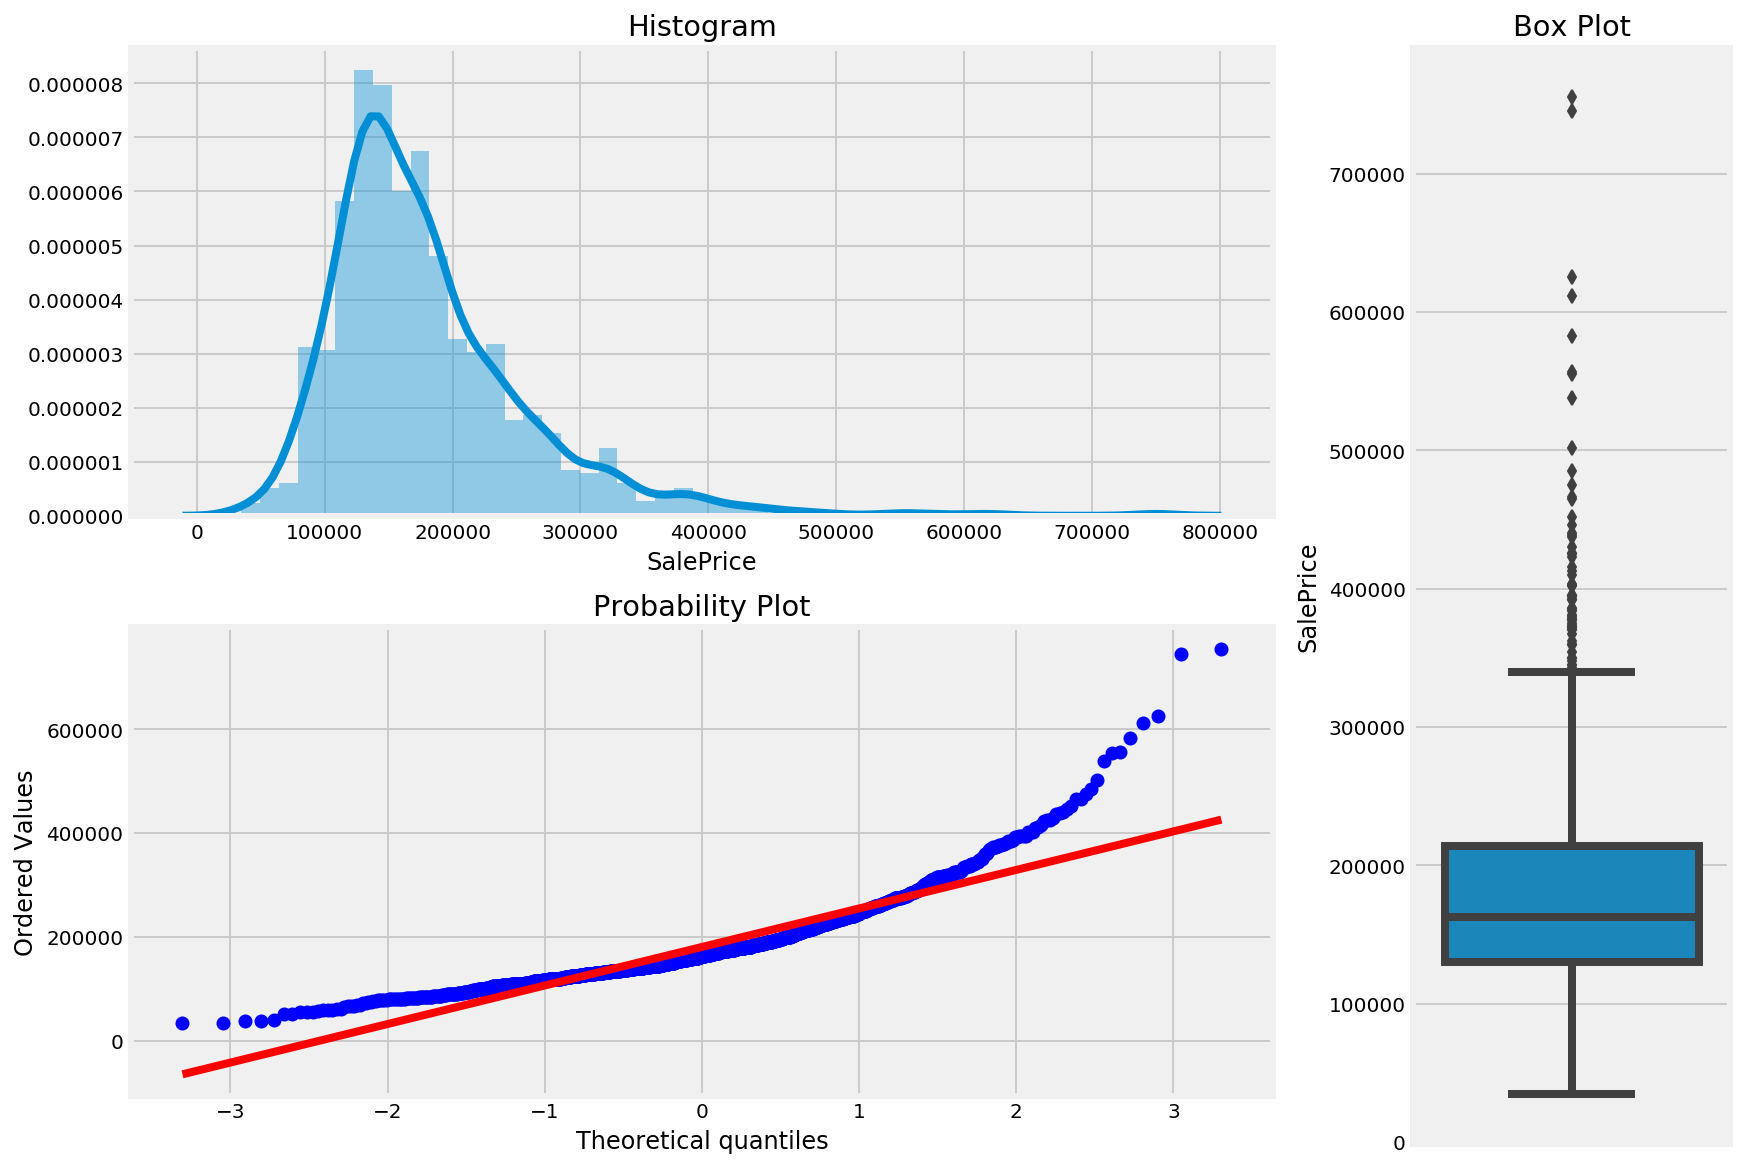

In [12]:
def plotting_3_chart(df, feature):


    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)


    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sb.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sb.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'SalePrice')

from the above figure, we can derived this information,the target variable, SalePrice is not normally distributedit ,is right-skewed and there are multiple outliers in the variable.

In [13]:
#skewness and kurtosis
print("Skewness: " + str(train['SalePrice'].skew()))
print("Kurtosis: " + str(train['SalePrice'].kurt()))

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


## Skewness
Skewness is a measure of symetry, a distribution is symetry when it looks the same to the left and to the right of the center point, what we don't have here. The skewness of a normal distribution is 0, a negative skew value indicate that the data is left-skewed otherwise right-skewed. Positive Skewness(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter.In positive Skewness the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price. Negative Skewness means the tail on the left side of the distribution is longer and fatter. In negative Skewness the mean and median will be less than the mode
From the histogram and the skew value we can see that our target variable is right-skewed.


## Kurtosis
Kurtosis is a measure of extreme value (Outliers) present in a distribution, it indicates whether the data is heavy-tailed or light-tailed relative to a normal distribution. Q position value indicates a heavy-tailed and a negative indicates a light-tailed distribution.
There are three types of Kurtosis: Mesokurtic, Leptokurtic, and Platykurtic.
Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution.
Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions.

In [14]:
# target varaible description
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [15]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["SalePrice"].sort_values(ascending = False)[1:]

OverallQual      0.625652
GrLivArea        0.502149
GarageCars       0.410124
GarageArea       0.388667
TotalBsmtSF      0.376481
1stFlrSF         0.367057
FullBath         0.314344
TotRmsAbvGrd     0.284860
YearBuilt        0.273422
YearRemodAdd     0.257151
GarageYrBlt      0.236548
MasVnrArea       0.228000
Fireplaces       0.218023
BsmtFinSF1       0.149320
WoodDeckSF       0.105244
2ndFlrSF         0.101974
OpenPorchSF      0.099765
HalfBath         0.080717
LotArea          0.069613
BsmtFullBath     0.051585
BsmtUnfSF        0.046001
BedroomAbvGr     0.028296
KitchenAbvGr     0.018471
EnclosedPorch    0.016532
ScreenPorch      0.012420
PoolArea         0.008538
MSSubClass       0.007104
OverallCond      0.006062
MoSold           0.002156
3SsnPorch        0.001988
YrSold           0.000837
LowQualFinSF     0.000656
Id               0.000480
MiscVal          0.000449
BsmtHalfBath     0.000284
BsmtFinSF2       0.000129
Name: SalePrice, dtype: float64

The top 3 corealted featurese to the target variable are OverallQual,GrLivArea ,GarageCars

Let's graphically visualize thease features and the target variable.

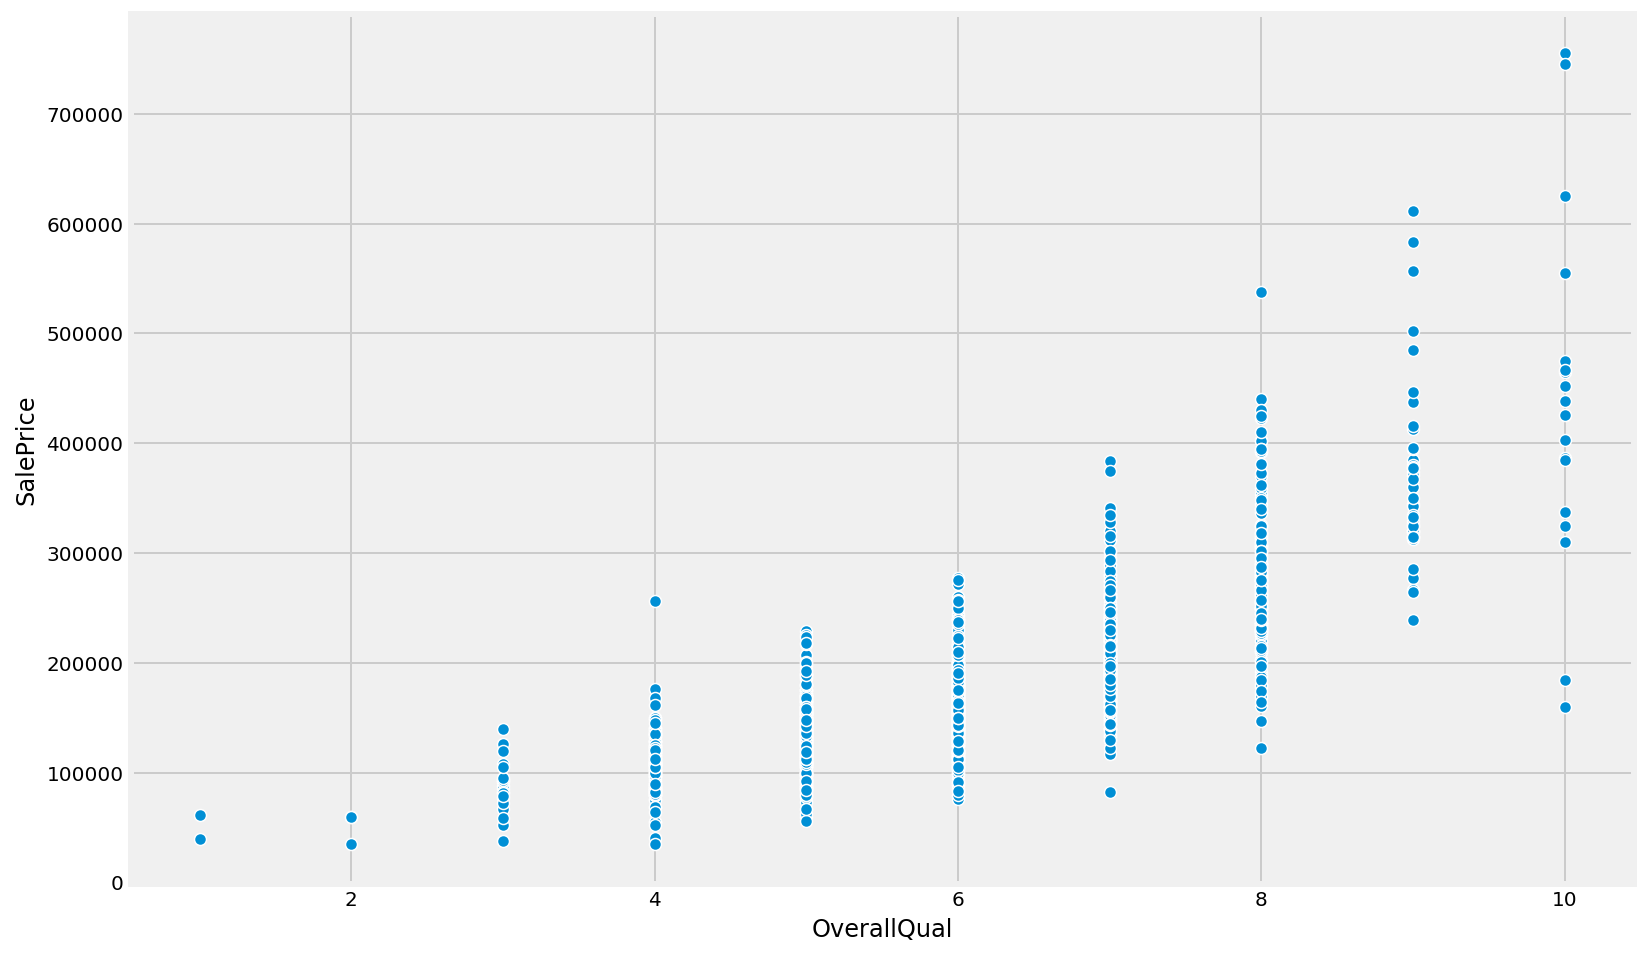

In [16]:
## Plotting target variable with predictor variable(OverallQual)
plt.subplots(figsize = (12,8))
sb.scatterplot(train.OverallQual,train.SalePrice)

From the above figure, we can see that the price of the houses increases with the overall quality

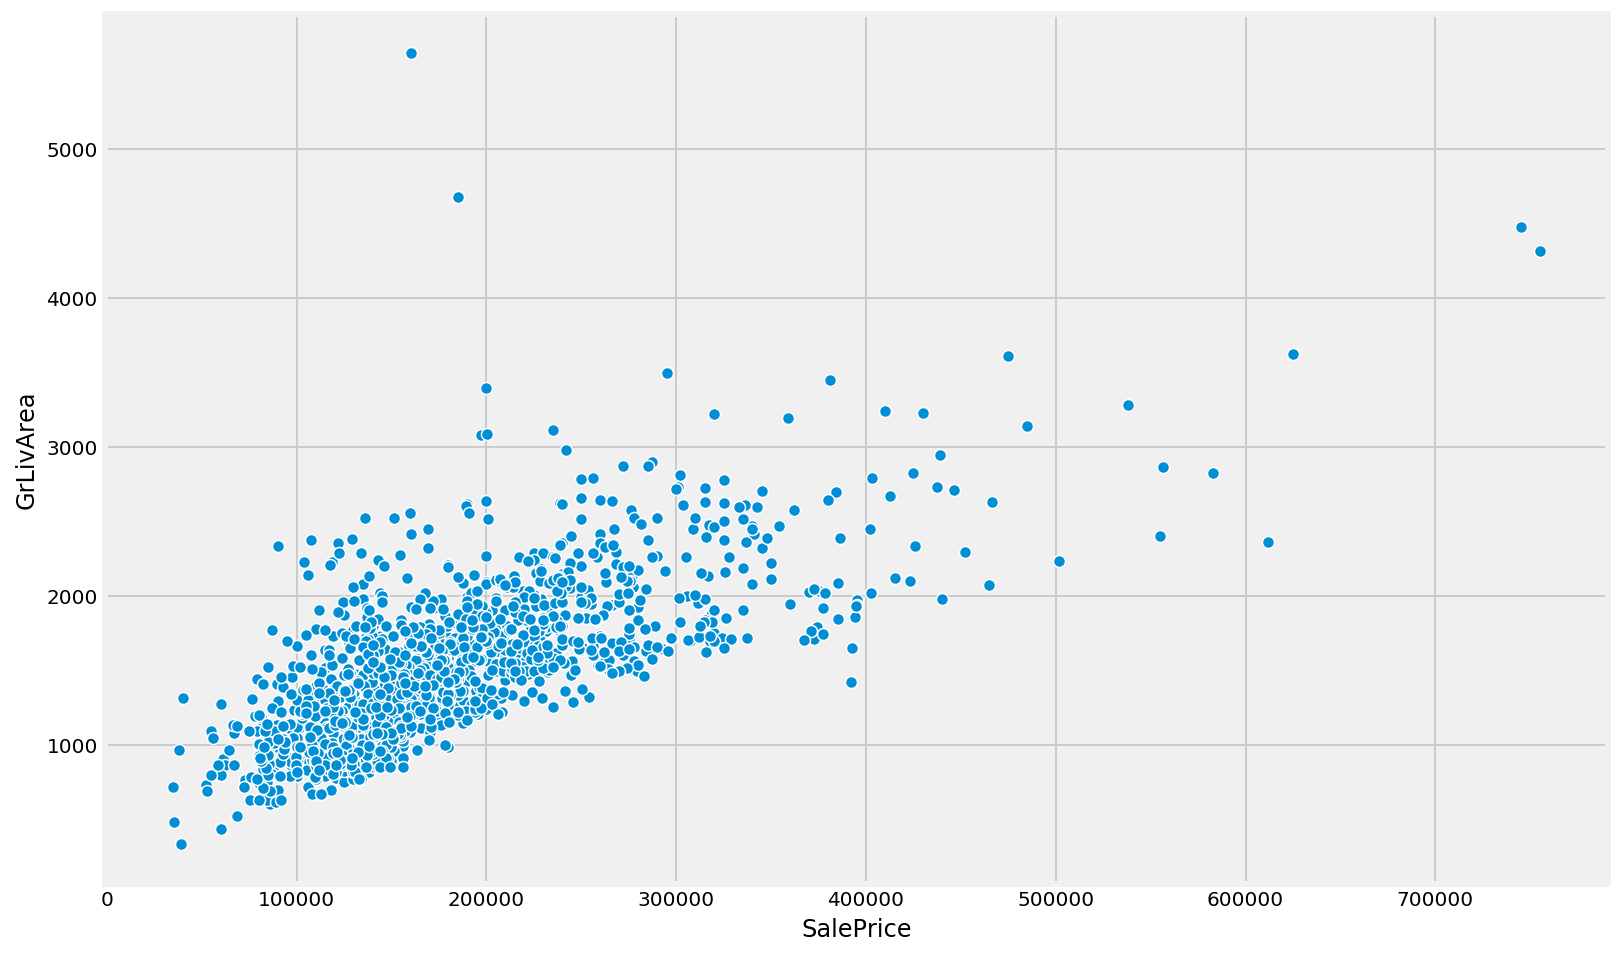

In [17]:
# SalePrice vs GrLivArea
plt.subplots(figsize = (12,8))
sb.scatterplot(train.SalePrice, train.GrLivArea)

We can see two outliers in this figure.Let's remove them

In [18]:
## Deleting those two values with outliers. 
train = train[train.GrLivArea < 4500]
train.reset_index(drop = True, inplace = True)

## save a copy of this dataset so that any changes later on can be compared side by side.
previous_train = train.copy()

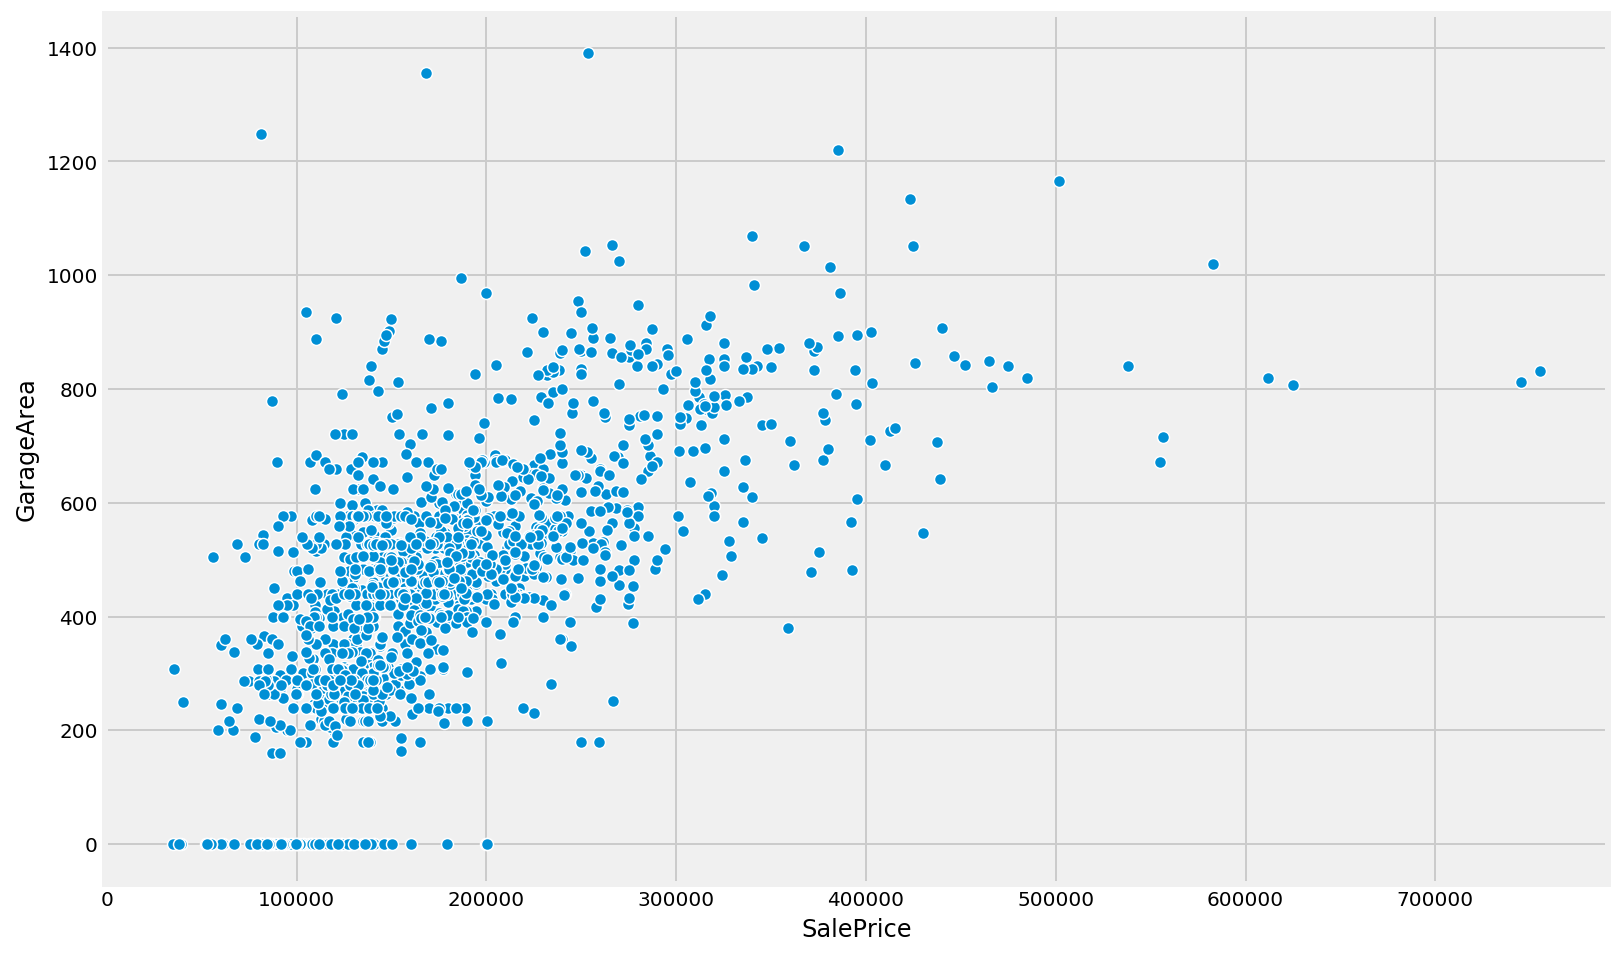

In [19]:
# SalePrice vs GarageArea
plt.subplots(figsize = (12,8))
sb.scatterplot(train.SalePrice, train.GarageArea)

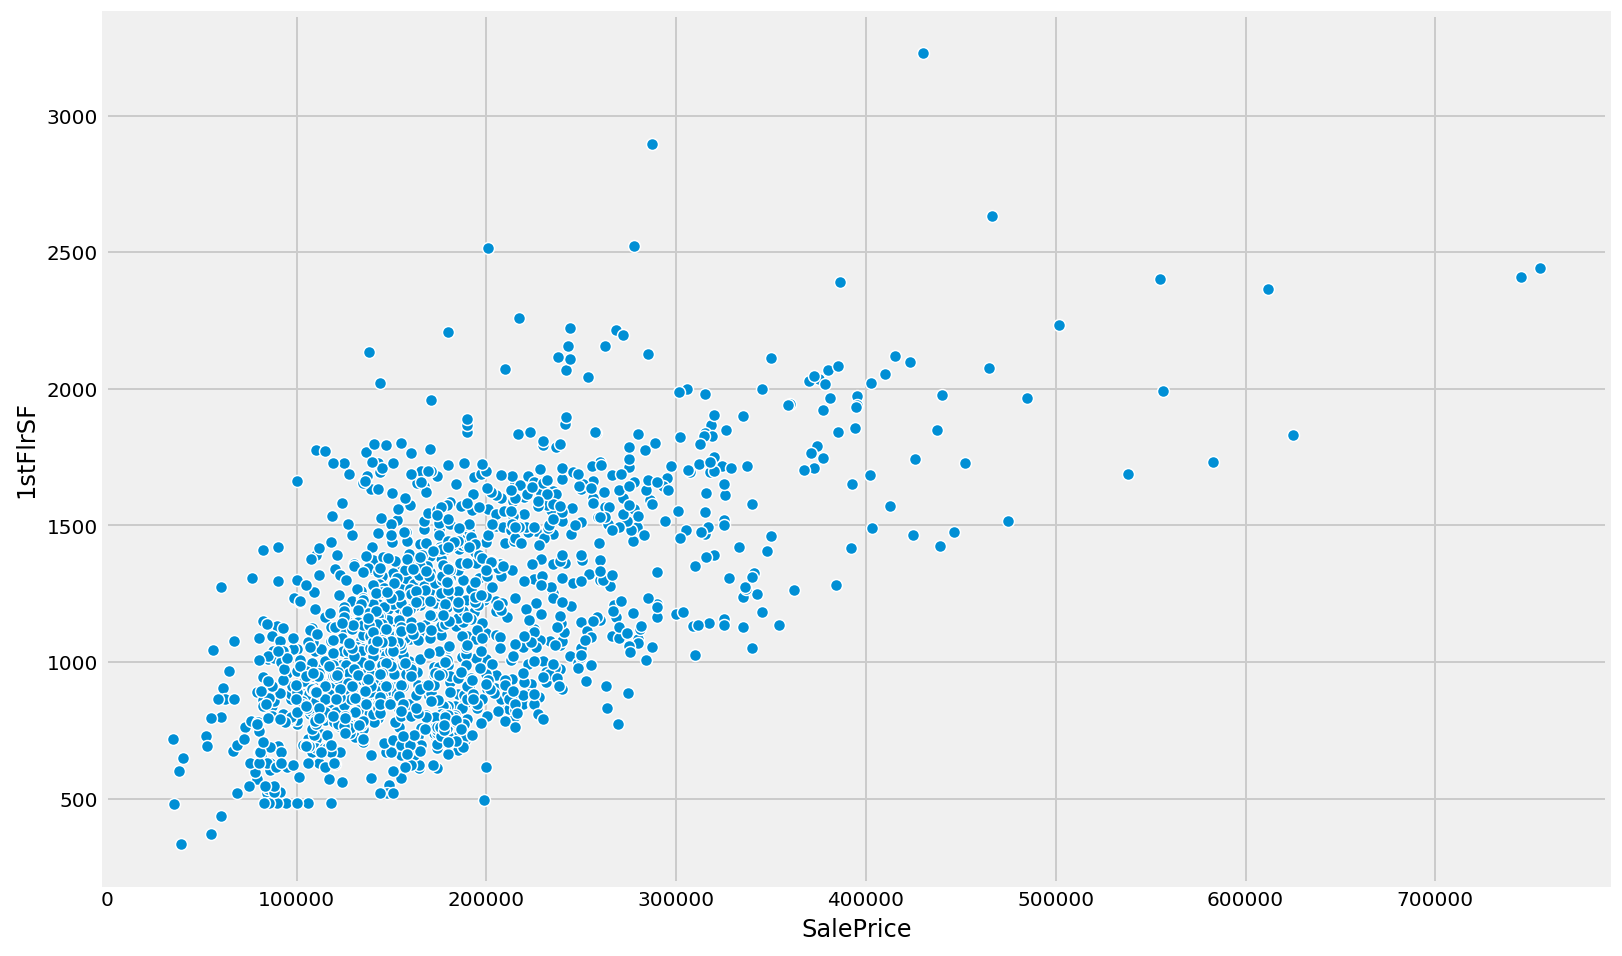

In [20]:
# Saleprice vs 1stFlrSF
plt.subplots(figsize = (12,8))
sb.scatterplot(train.SalePrice, train['1stFlrSF'])

Our target variable shows an unequal level of variance across most predictor(independent) variables. This is called Heteroscedasticity

As we look through these scatter plots, I realized that it is time to explain the assumptions of Multiple Linear Regression. Before building a multiple linear regression model, we need to check that these assumptions below are valid.

Assumptions of Regression
Linearity ( Correct functional form )
Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
Independence of Errors ( vs Autocorrelation )
Multivariate Normality ( Normality of Errors )
No or little Multicollinearity.

Since we fit a linear model, we assume that the relationship is linear, and the errors, or residuals, are pure random fluctuations around the true line. We expect that the variability in the response(dependent) variable doesn't increase as the value of the predictor(independent) increases, which is the assumptions of equal variance, also known as Homoscedasticity. We also assume that the observations are independent of one another(No Multicollinearity), and a correlation between sequential observations or auto-correlation is not there.

Now, these assumptions are prone to happen altogether. In other words, if we see one of these assumptions in the dataset, it's more likely that we may come across with others mentioned above. Therefore, we can find and fix various assumptions with a few unique techniques.

So, How do we check regression assumptions? We fit a regression line and look for the variability of the response data along the regression line. Let's apply this to each one of them.

Linearity(Correct functional form): Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present.

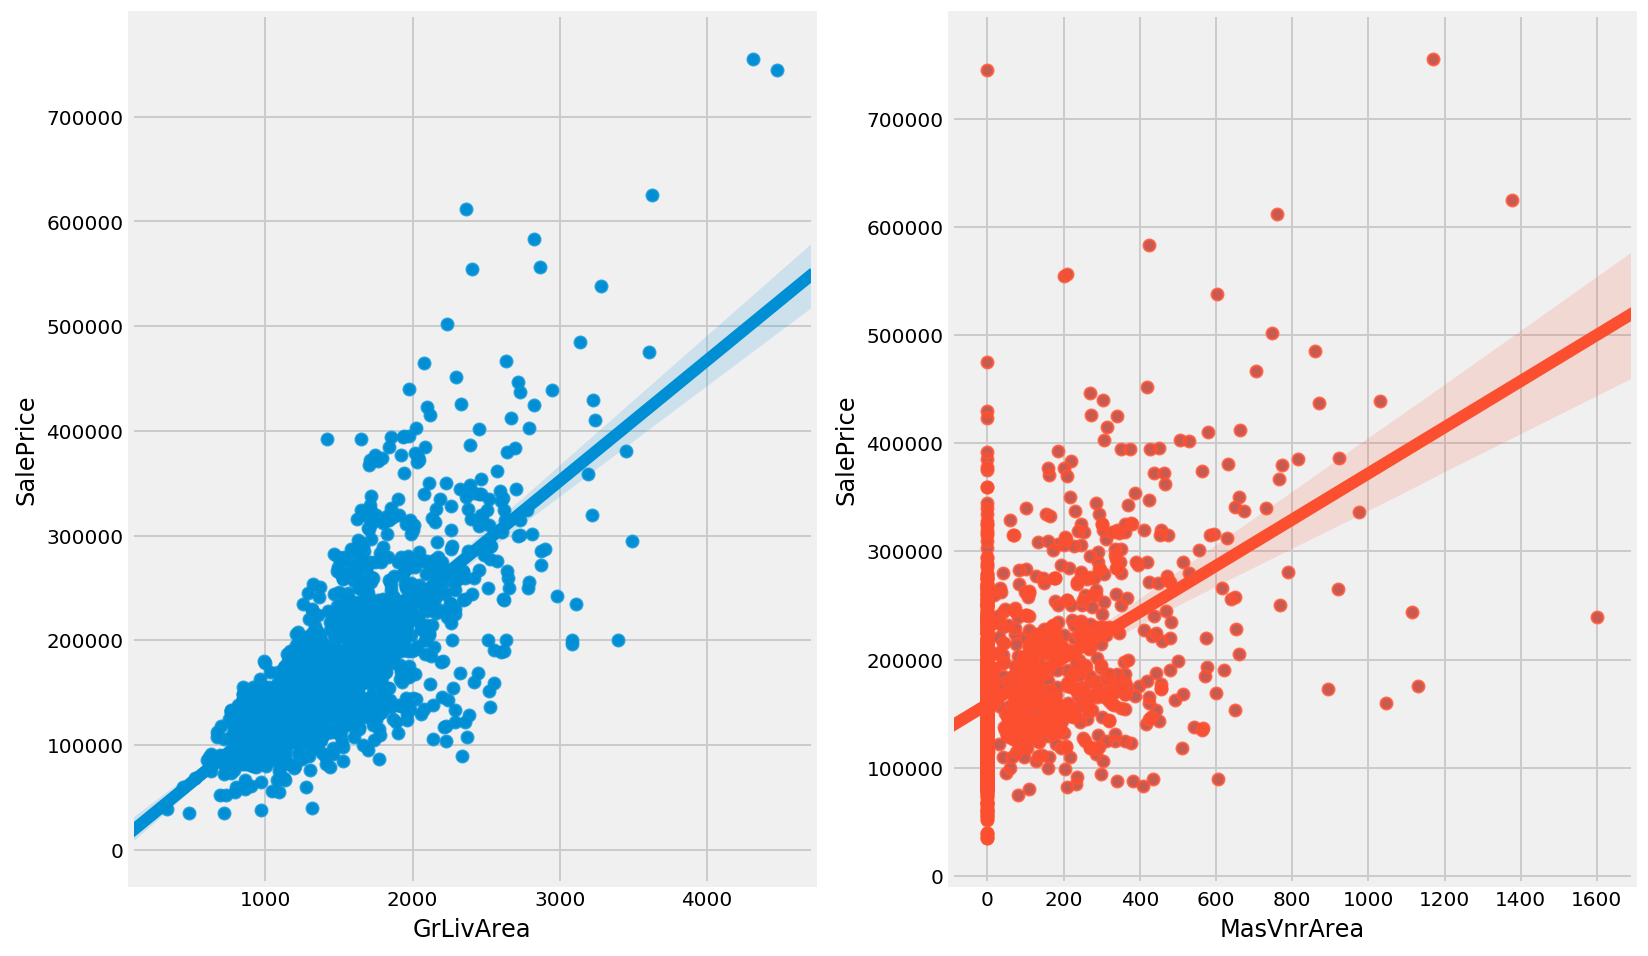

In [21]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for SalePrice and GrLivArea. 
sb.scatterplot( x = train.GrLivArea, y = train.SalePrice,  ax=ax1)
## Putting a regression line. 
sb.regplot(x=train.GrLivArea, y=train.SalePrice, ax=ax1)

## Scatter plotting for SalePrice and MasVnrArea. 
sb.scatterplot(x = train.MasVnrArea,y = train.SalePrice, ax=ax2)
## regression line for MasVnrArea and SalePrice. 
sb.regplot(x=train.MasVnrArea, y=train.SalePrice, ax=ax2);

It's pretty apparent from the chart that there is a better linear relationship between SalePrice and GrLivArea than SalePrice and MasVnrArea. W can see some outliers in the data

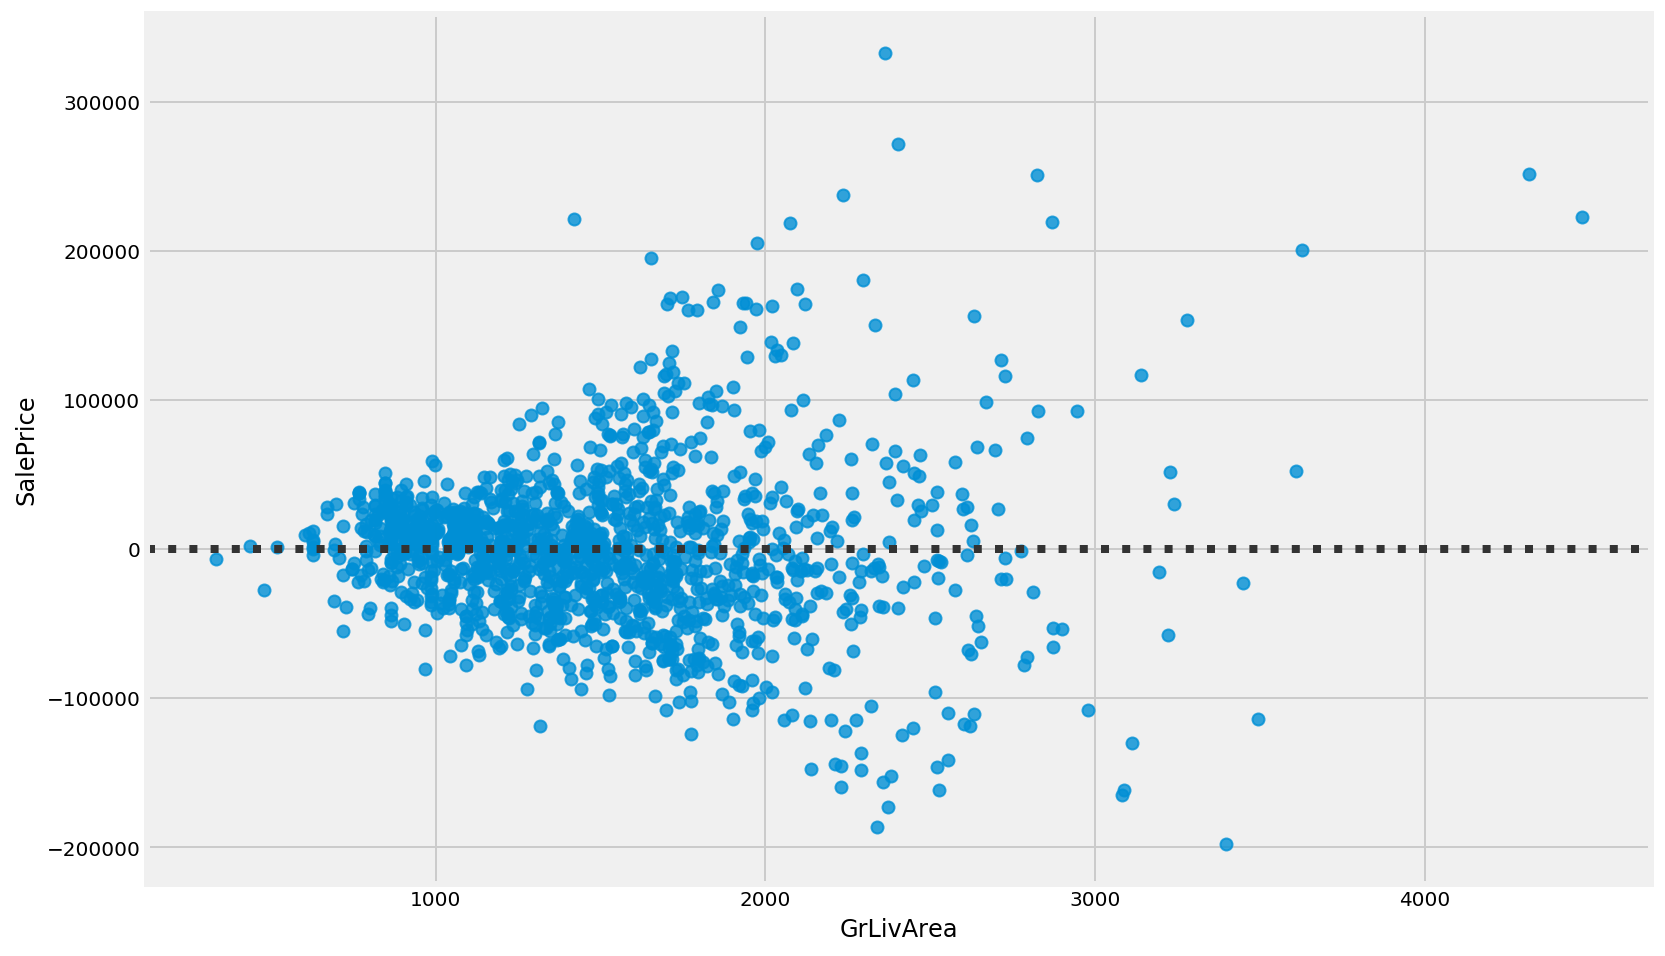

In [22]:
plt.subplots(figsize = (12,8))
sb.residplot(train.GrLivArea, train.SalePrice);

Ideally, if the assumptions are met, the residuals will be randomly scattered around the centerline of zero with no apparent pattern. The residual will look like an unstructured cloud of points centered around zero.
However, our residual plot is anything but an unstructured cloud of points.

Let's perform some transformation on the target data.

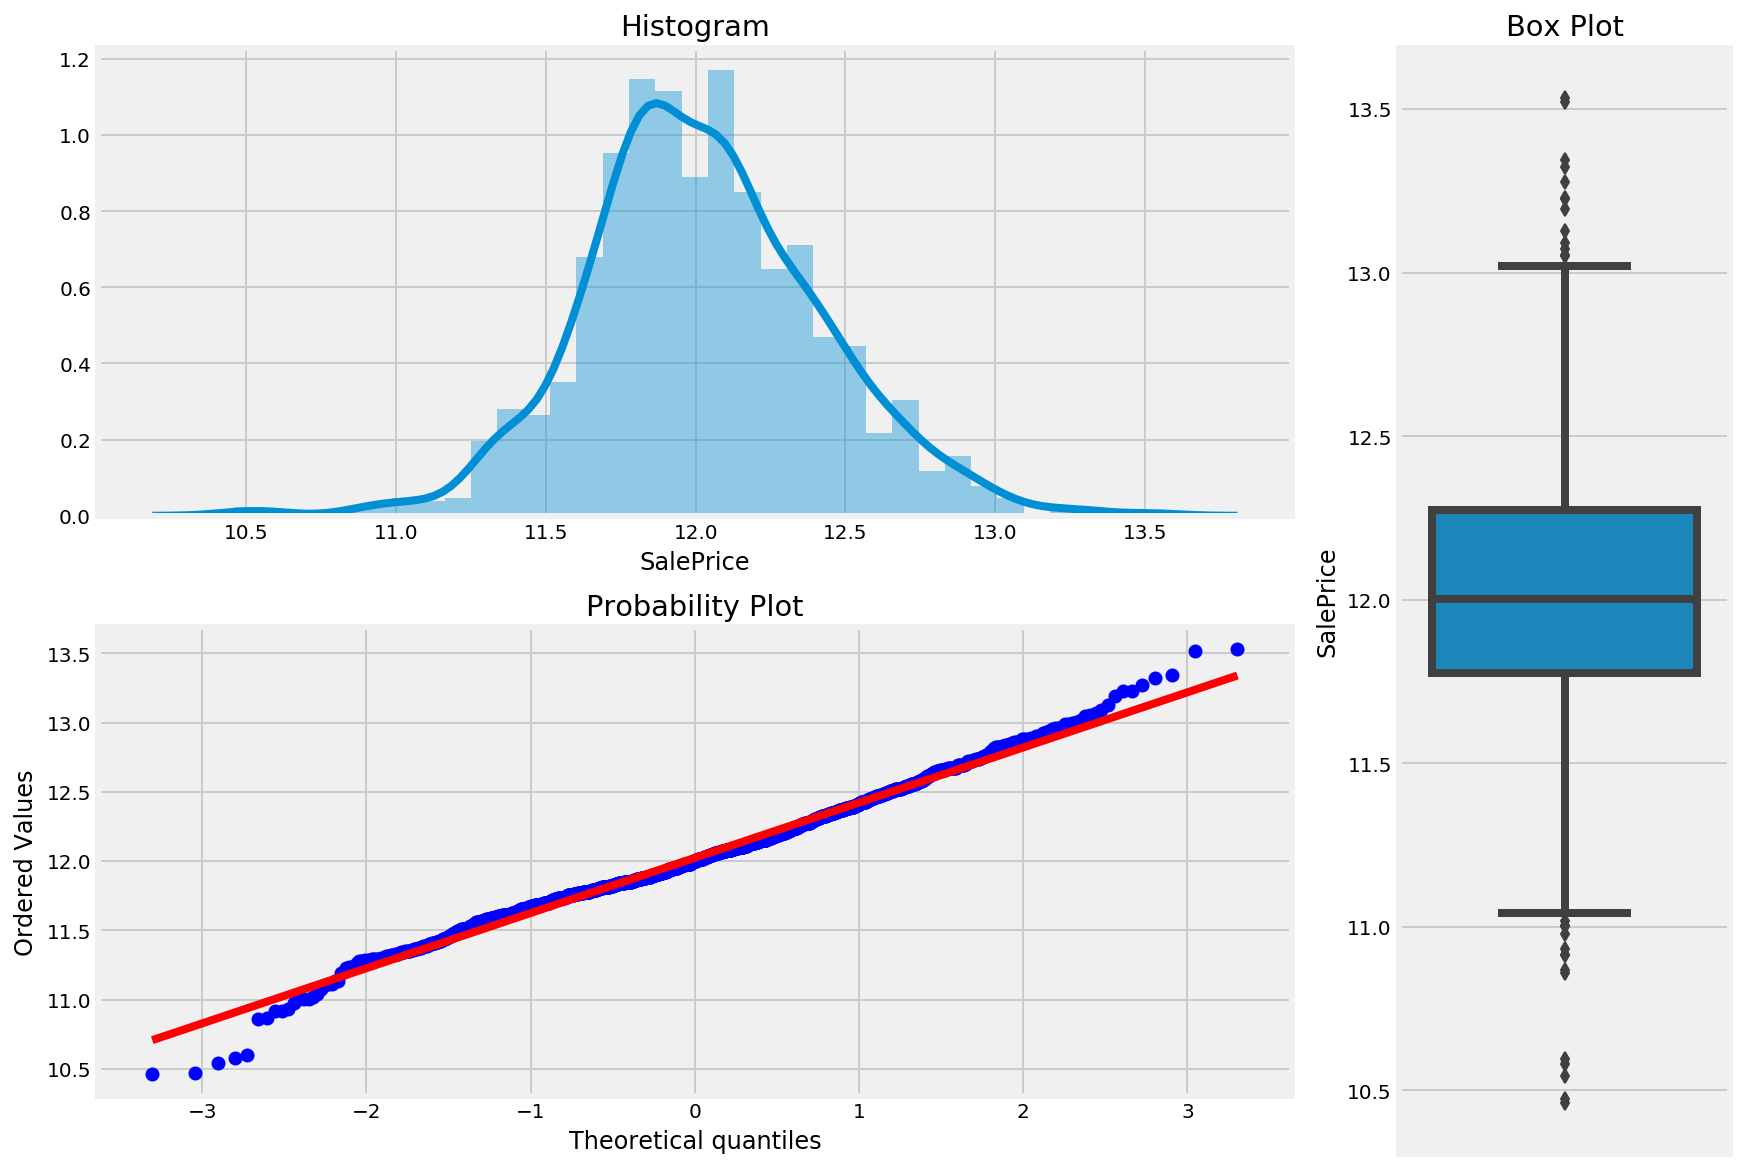

In [23]:
## trainsforming target variable using numpy.log1p, 
train["SalePrice"] = np.log1p(train["SalePrice"])

## Plotting the newly transformed response variable
plotting_3_chart(train, 'SalePrice')

In [24]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 0.121580
Kurtosis: 0.804751


By transforming the target data, we got a better normal distribution data and we can see from the Probality plot that there is more better, although there are still some outliers in the data.
A good skewness and kurosis values.

let's visualize top 20 most corrolated features

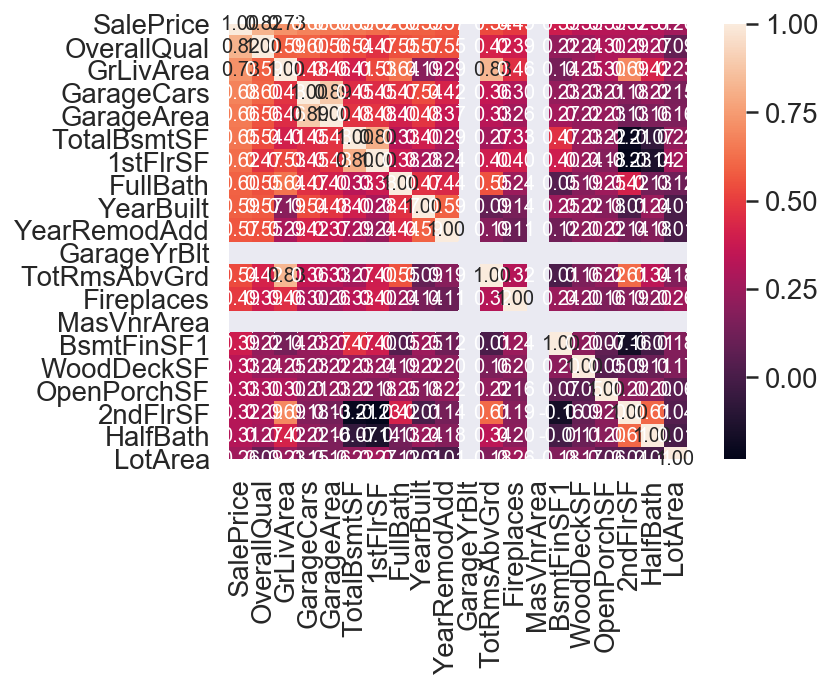

In [25]:
# Top 10 Heatmap
k = 20 #number of variables for heatmap
corrmat=train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sb.set(font_scale=1.25)
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
most_corr

,Most Correlated Features
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,1stFlrSF
7,FullBath
8,YearBuilt
9,YearRemodAdd


In [27]:
# Removing outliers manually (Two points in the bottom right)
train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)

# TARGET VARIABLE VS CATEGORICAL VARIABLE

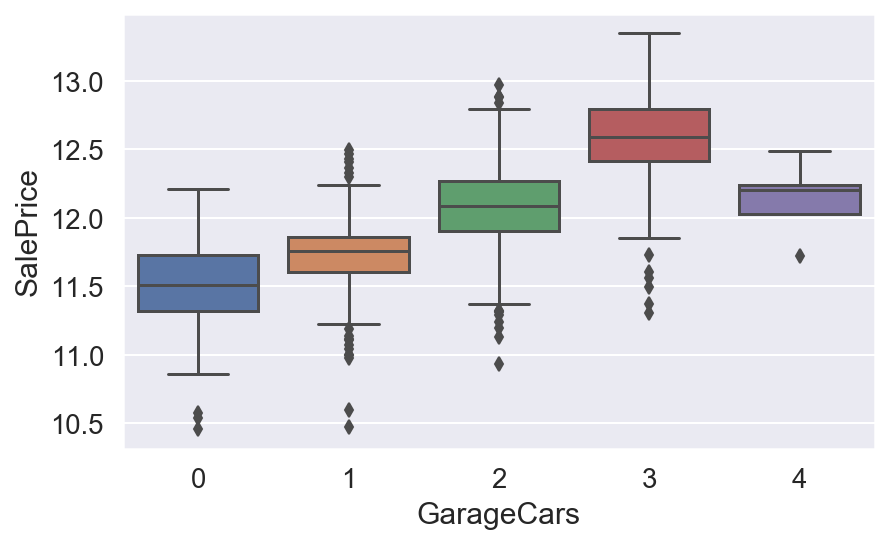

In [28]:
# Garage Cars Area vs Sale Price
sb.boxplot(x=train['GarageCars'], y=train['SalePrice'])

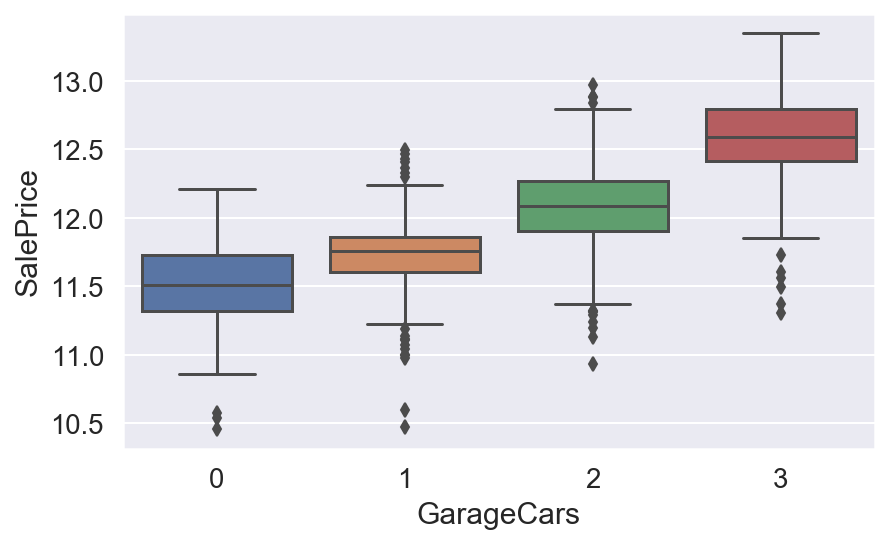

In [29]:
# Removing outliers manually (More than 4-cars, less than $300k)
train = train.drop(train[(train['GarageCars']>3) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)
sb.boxplot(x=train['GarageCars'], y=train['SalePrice'])

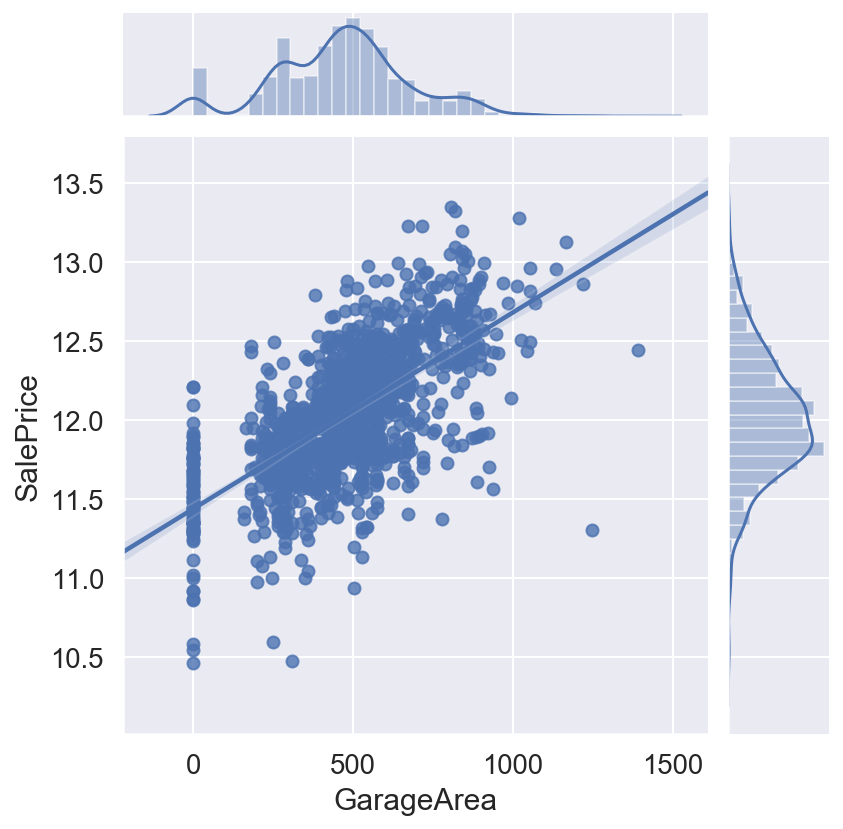

In [30]:
# Garage Area vs Sale Price
sb.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')


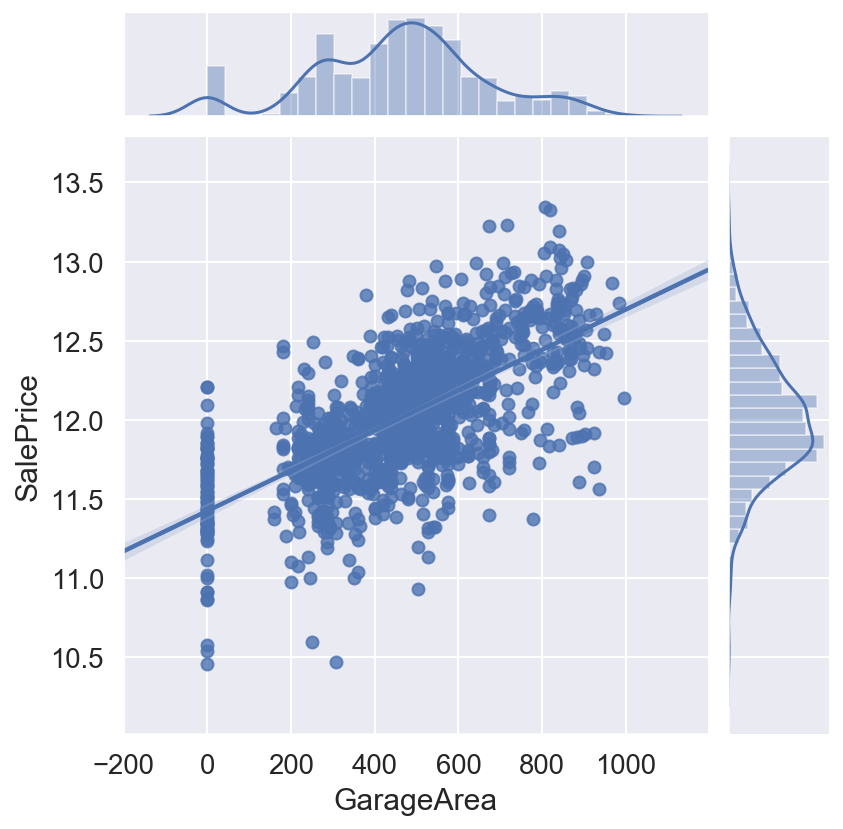

In [31]:
# Removing outliers manually (More than 1000 sqft, less than $300k)
train = train.drop(train[(train['GarageArea']>1000) 
                         & (train['SalePrice']<300000)].index).reset_index(drop=True)
sb.jointplot(x=train['GarageArea'], y=train['SalePrice'], kind='reg')

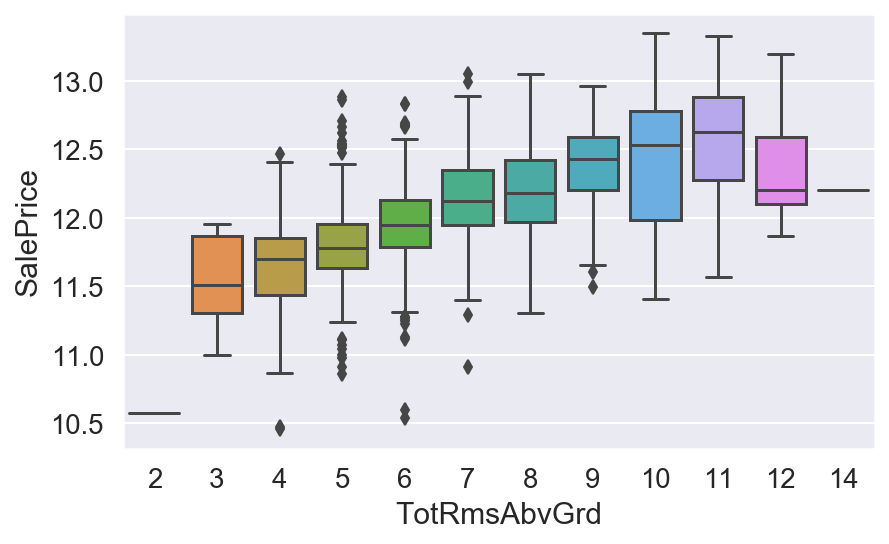

In [32]:
# Total Rooms vs Sale Price
sb.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])

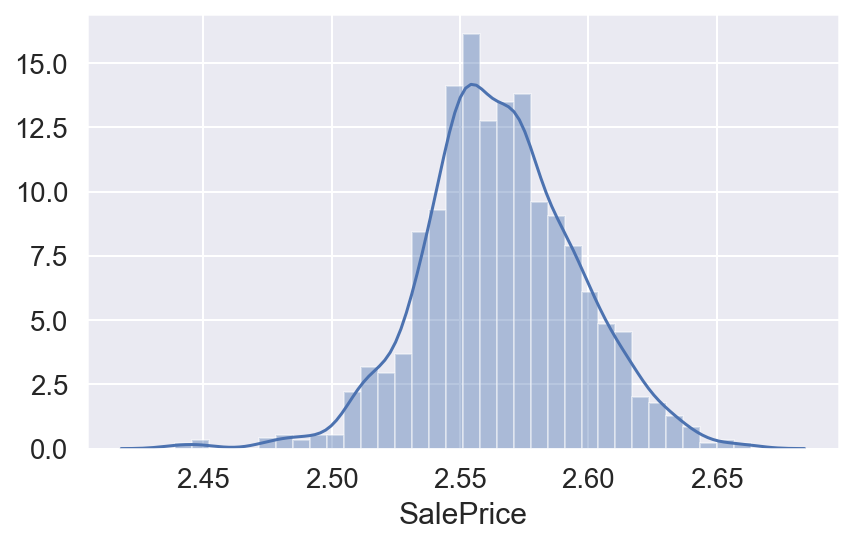

In [33]:
# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sb.distplot(train['SalePrice']);

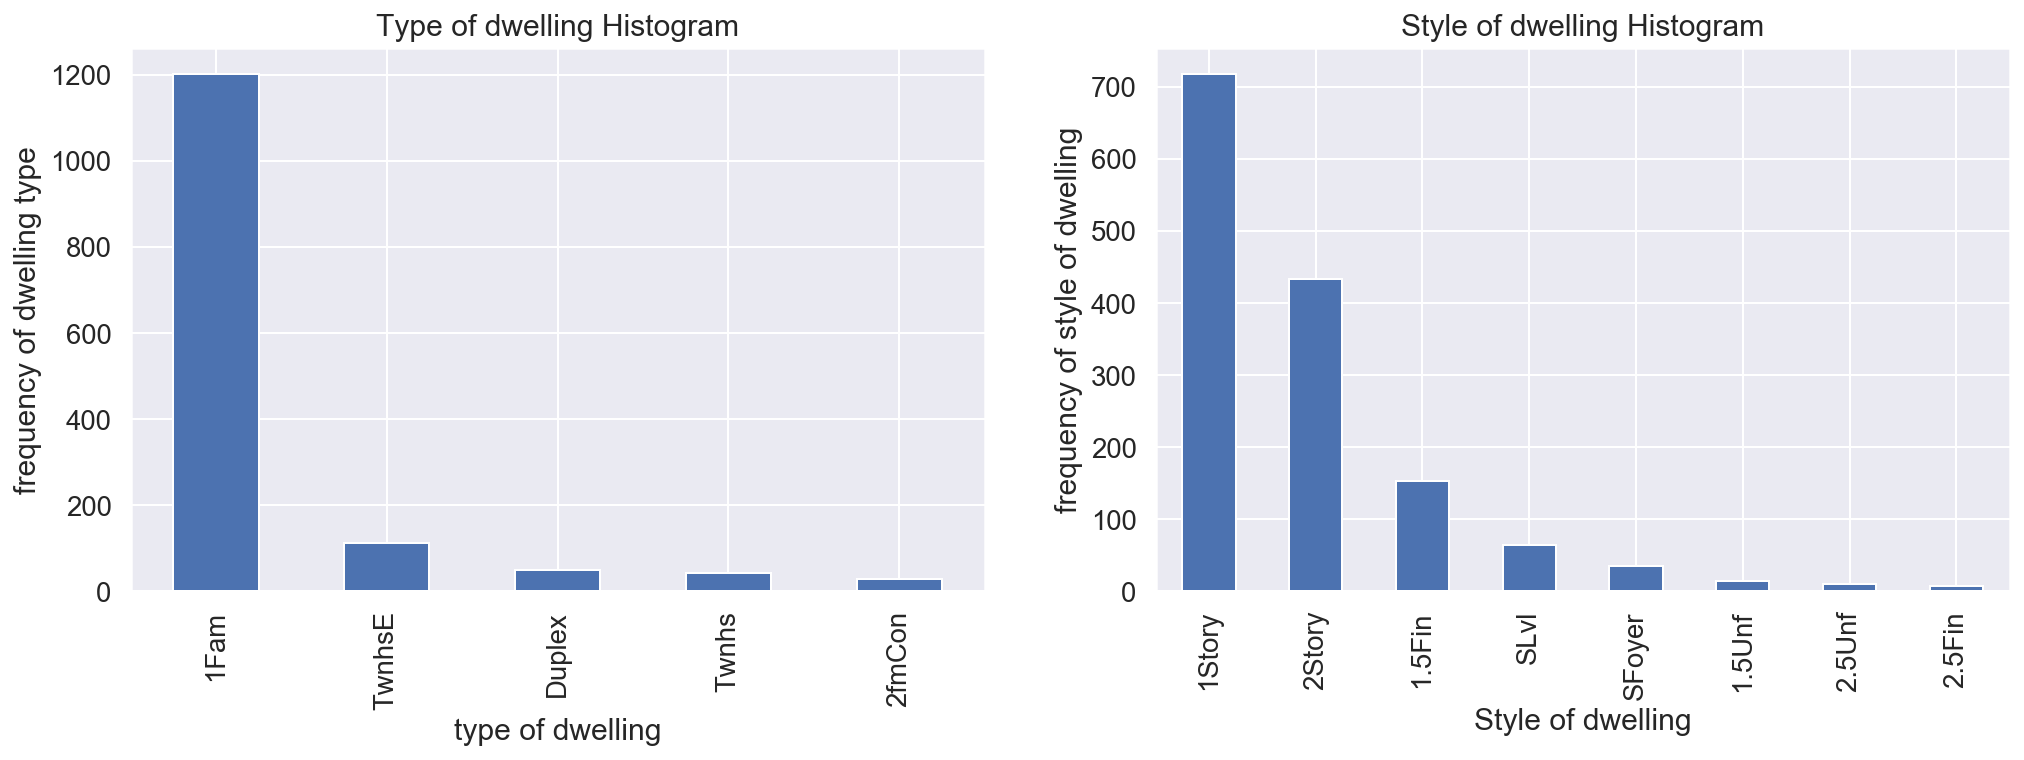

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = train.BldgType.value_counts().plot('bar')
plt.title('Type of dwelling Histogram')
plt1.set(xlabel = 'type of dwelling', ylabel='frequency of dwelling type')

plt.subplot(1,2,2)
plt1 = train.HouseStyle.value_counts().plot('bar')
plt.title('Style of dwelling Histogram')
plt1.set(xlabel = 'Style of dwelling', ylabel='frequency of style of dwelling')

plt.show()

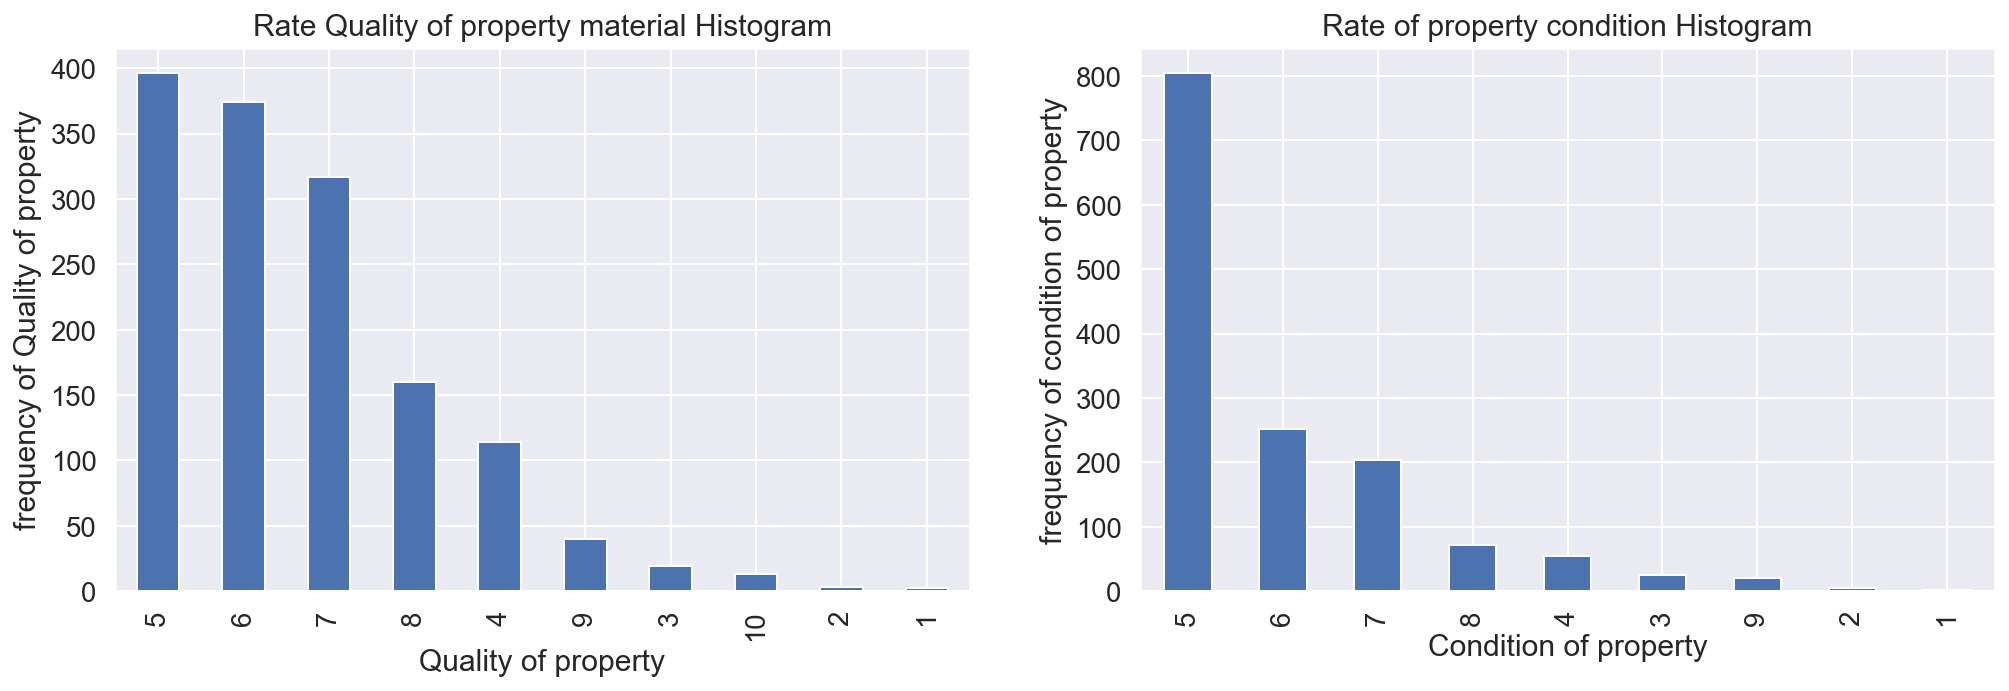

In [35]:
# rate of the overall material and condition of the house
#        10	Very Excellent
#        9	Excellent
#        8	Very Good
#        7	Good
#        6	Above Average
#        5	Average
#        4	Below Average
#        3	Fair
#        2	Poor
#        1	Very Poor

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = train.OverallQual.value_counts().plot('bar')
plt.title('Rate Quality of property material Histogram')
plt1.set(xlabel = 'Quality of property', ylabel='frequency of Quality of property')


plt.subplot(1,2,2)
plt1 = train.OverallCond.value_counts().plot('bar')
plt.title('Rate of property condition Histogram')
plt1.set(xlabel = 'Condition of property', ylabel='frequency of condition of property')

plt.show()

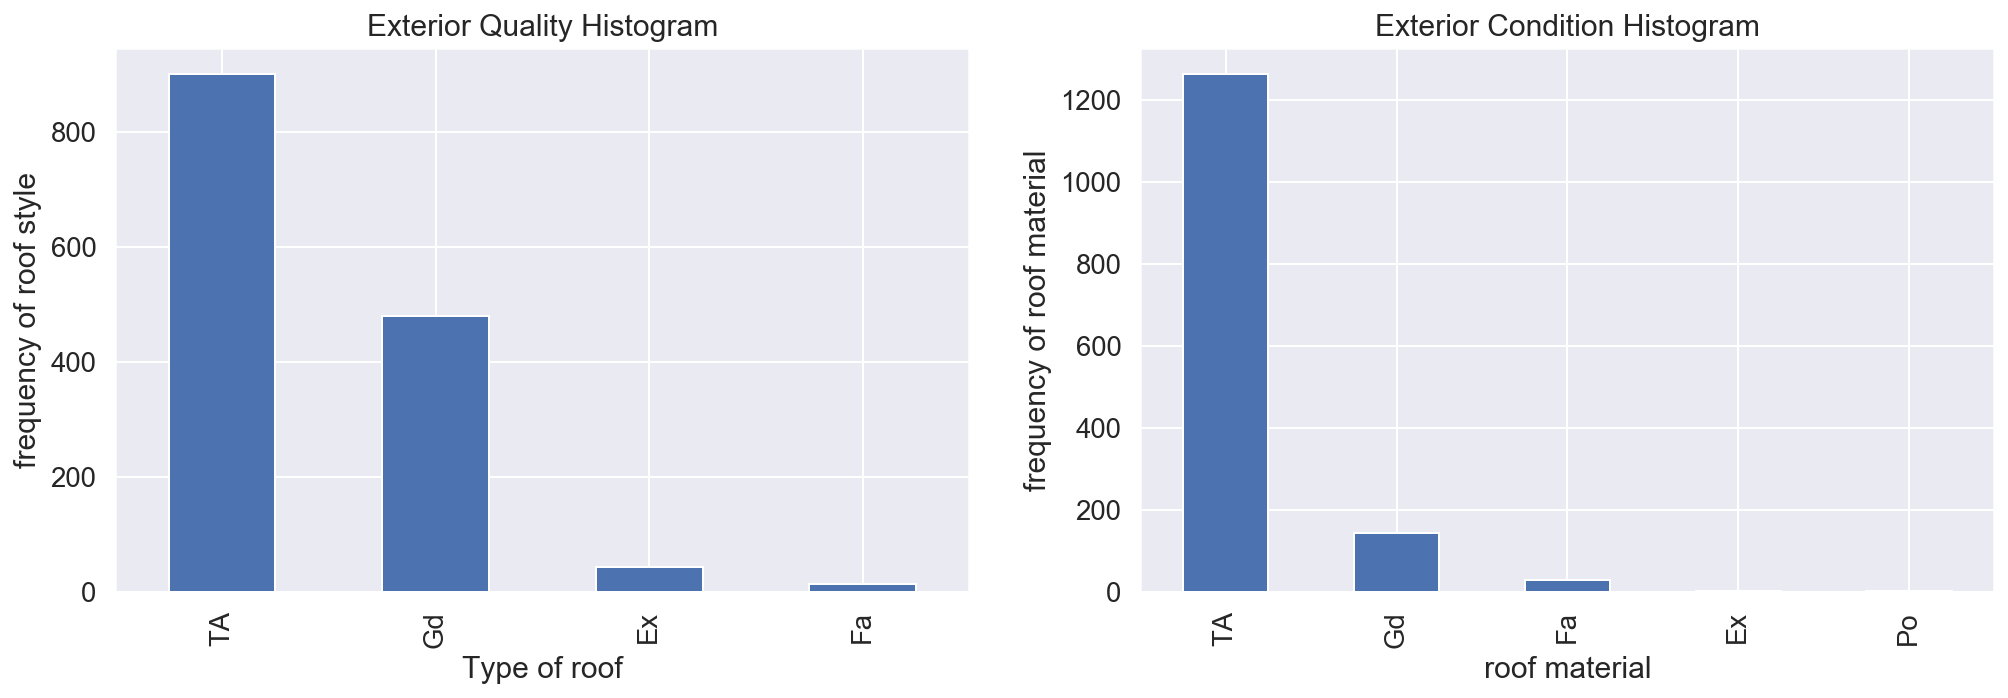

In [36]:
	
#        Ex=Excellent
#        Gd=Good
#        TA=Average/Typical
#        Fa=Fair
#        Po=Poor
		
plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = train.ExterQual.value_counts().plot('bar')
plt.title('Exterior Quality Histogram')
plt1.set(xlabel = 'Type of roof', ylabel='frequency of roof style')


plt.subplot(1,2,2)
plt1 = train.ExterCond.value_counts().plot('bar')
plt.title('Exterior Condition Histogram')
plt1.set(xlabel = 'roof material', ylabel='frequency of roof material')

plt.show()

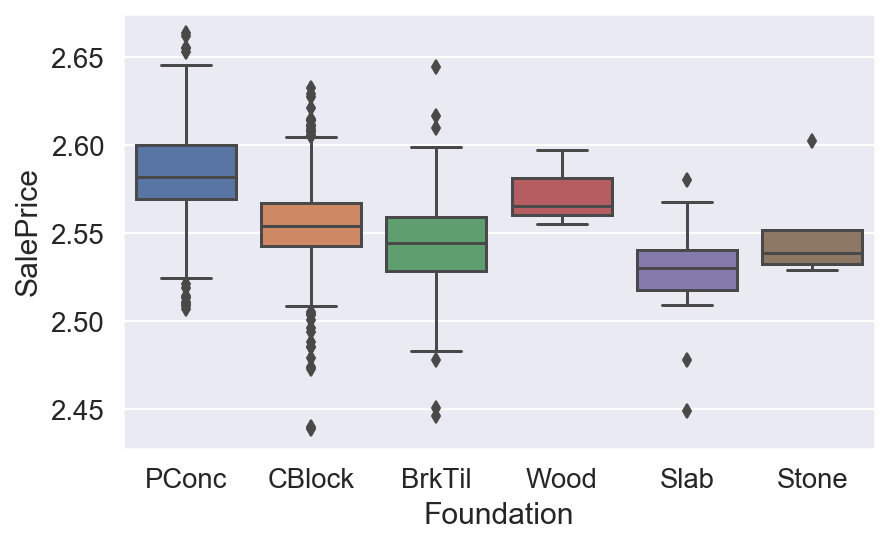

In [37]:
sb.boxplot(x=train.Foundation, y=train.SalePrice)

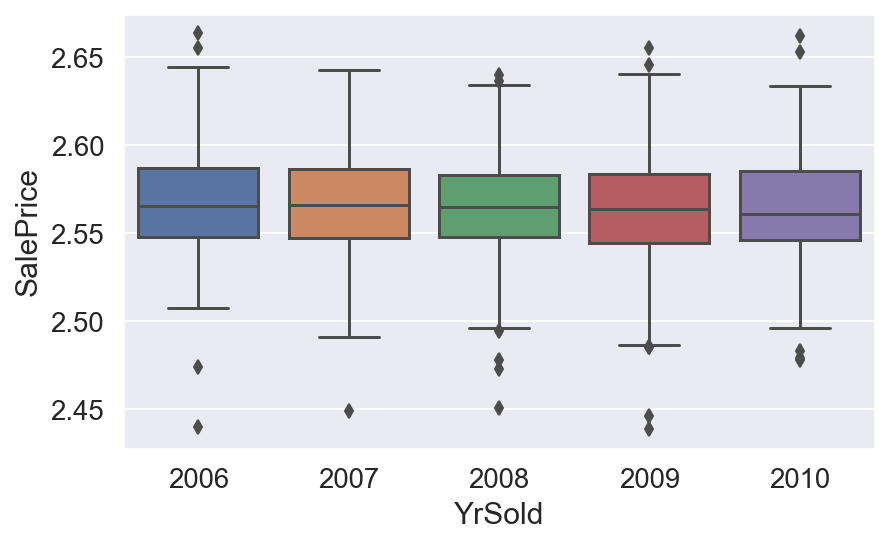

In [38]:
sb.boxplot(x=train.YrSold, y=train.SalePrice)

# DATA ENGINEERING

In [39]:
#Replacing missing value by mean function
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())

In [40]:
# Important years and months that should be categorical variables not numerical.

train['YrSold'] = train['YrSold'].astype(str)
test['YrSold'] = test['YrSold'].astype(str)

In [41]:
# Categorical boolean mask
categorical_feature_mask = train.dtypes==object

# filter categorical columns using mask and turn it into alist
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [42]:
# Performing Label encoder to the train cat variables
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

In [43]:
# Performing Label encoder to the train cat variables

categorical_feature_mask_test = test.dtypes==object
categorical_cols_test = test.columns[categorical_feature_mask_test].tolist()
test[categorical_cols] = test[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))

# MODEL BUILDING

In [44]:
train

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2,8,4,2.583824
1,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,1,8,4,2.573300
2,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2,8,4,2.589054
3,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,0,8,0,2.553297
4,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2,8,4,2.597433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1433,1456,60,3,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,1,8,4,2.570514
1434,1457,20,3,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,4,8,4,2.584365
1435,1458,70,3,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,4,8,4,2.602181
1436,1459,20,3,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,4,8,4,2.554469


In [45]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.3, random_state=101)
X_train.shape

(1006, 74)

In [47]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

# feature scaling

sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [48]:
#DECISION TREE MODEL

DTmodel = DecisionTreeRegressor(random_state = 100)
DTmodel.fit(X_train, y_train)
dtr_pred = DTmodel.predict(X_test)
dtr_pred=dtr_pred.reshape(-1,1)
print('DECISION TREE MODEL MAE:', mae(y_test, dtr_pred))
print('DECISION TREE MODEL MSE:', mse(y_test, dtr_pred))
print('DECISION TREE MODEL RMSE:', np.sqrt(mse(y_test, dtr_pred)))

DECISION TREE MODEL MAE: 0.3918849601041242
DECISION TREE MODEL MSE: 0.31169235811037754
DECISION TREE MODEL RMSE: 0.5582941501667177


In [49]:
#LINEAR REGRESSION MODEL

LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
lr_pred = LRmodel.predict(X_test)
lr_pred=dtr_pred.reshape(-1,1)
print('LINEAR REGRESSION   MAE:', mae(y_test, lr_pred))
print('LINEAR REGRESSION  MSE:', mse(y_test, lr_pred))
print('LINEAR REGRESSION  RMSE:', np.sqrt(mse(y_test, lr_pred)))

LINEAR REGRESSION   MAE: 0.3918849601041242
LINEAR REGRESSION  MSE: 0.31169235811037754
LINEAR REGRESSION  RMSE: 0.5582941501667177


In [50]:
#CATBOOST REGRESSOR MODEL

CBmodel = CatBoostRegressor()
CBmodel.fit(X_train, y_train)
cb_pred = CBmodel.predict(X_test)
cb_pred=cb_pred.reshape(-1,1)
print('CATBOOST REGRESSOR   MAE:', mae(y_test, cb_pred))
print('CATBOOST REGRESSOR  MSE:', mse(y_test, cb_pred))
print('CATBOOST REGRESSOR  RMSE:', np.sqrt(mse(y_test, cb_pred)))

Learning rate set to 0.039072
0:	learn: 0.9758181	total: 63.9ms	remaining: 1m 3s
1:	learn: 0.9498919	total: 73.8ms	remaining: 36.8s
2:	learn: 0.9254276	total: 82.4ms	remaining: 27.4s
3:	learn: 0.9026688	total: 90ms	remaining: 22.4s
4:	learn: 0.8829259	total: 98.5ms	remaining: 19.6s
5:	learn: 0.8630342	total: 106ms	remaining: 17.6s
6:	learn: 0.8432499	total: 114ms	remaining: 16.2s
7:	learn: 0.8245722	total: 122ms	remaining: 15.1s
8:	learn: 0.8082810	total: 129ms	remaining: 14.3s
9:	learn: 0.7907854	total: 138ms	remaining: 13.6s
10:	learn: 0.7750098	total: 147ms	remaining: 13.2s
11:	learn: 0.7578627	total: 155ms	remaining: 12.7s
12:	learn: 0.7410297	total: 162ms	remaining: 12.3s
13:	learn: 0.7255520	total: 170ms	remaining: 12s
14:	learn: 0.7107594	total: 179ms	remaining: 11.8s
15:	learn: 0.6959927	total: 186ms	remaining: 11.4s
16:	learn: 0.6824034	total: 190ms	remaining: 11s
17:	learn: 0.6681600	total: 195ms	remaining: 10.6s
18:	learn: 0.6569607	total: 199ms	remaining: 10.3s
19:	learn: 0

In [51]:
#XGBOOST REGRESSOR MODEL

xgmodel = xgb.XGBRegressor()
xgmodel.fit(X_train, y_train)
xg_pred = xgmodel.predict(X_test)
# lr_pred=dtr_pred.reshape(-1,1)
print('XGBOOST REGRESSOR   MAE:', mae(y_test, xg_pred))
print('XGBOOST REGRESSOR  MSE:', mse(y_test, xg_pred))
print('XGBOOST REGRESSOR  RMSE:', np.sqrt(mse(y_test, xg_pred)))

XGBOOST REGRESSOR   MAE: 0.2664601196654798
XGBOOST REGRESSOR  MSE: 0.14420497191971243
XGBOOST REGRESSOR  RMSE: 0.37974329739932533


In [52]:
#EXTRATREE REGRESSOR MODEL

etmodel = ExtraTreesRegressor()
etmodel.fit(X_train, y_train)
et_pred = etmodel.predict(X_test)
# lr_pred=dtr_pred.reshape(-1,1)
print('EXTRATREE REGRESSOR   MAE:', mae(y_test, et_pred))
print('EXTRATREE REGRESSOR  MSE:', mse(y_test, et_pred))
print('EXTRATREE REGRESSOR  RMSE:', np.sqrt(mse(y_test, et_pred)))

EXTRATREE REGRESSOR   MAE: 0.248277683961212
EXTRATREE REGRESSOR  MSE: 0.13028547814067964
EXTRATREE REGRESSOR  RMSE: 0.36095079739582187


In [53]:
# #LIGHTGBM REGRESSOR MODEL

# LGmodel = lgb.LGBMRegressor()
# LGmodel.fit(X_train, y_train)
# LG_pred = LGmodel.predict(X_test)
# # lr_pred=dtr_pred.reshape(-1,1)
# print('LIGHTGBM REGRESSOR   MAE:', mae(y_test, LG_pred))
# print('LIGHTGBM REGRESSOR  MSE:', mse(y_test, LG_pred))
# print('LIGHTGBM REGRESSOR  RMSE:', np.sqrt(mse(y_test, LG_pred)))

Finally ! CATBOOST regressor is the best model v]because it has the smallest RMSE score which is a metric that measure the error between the precicted values and the actual value.

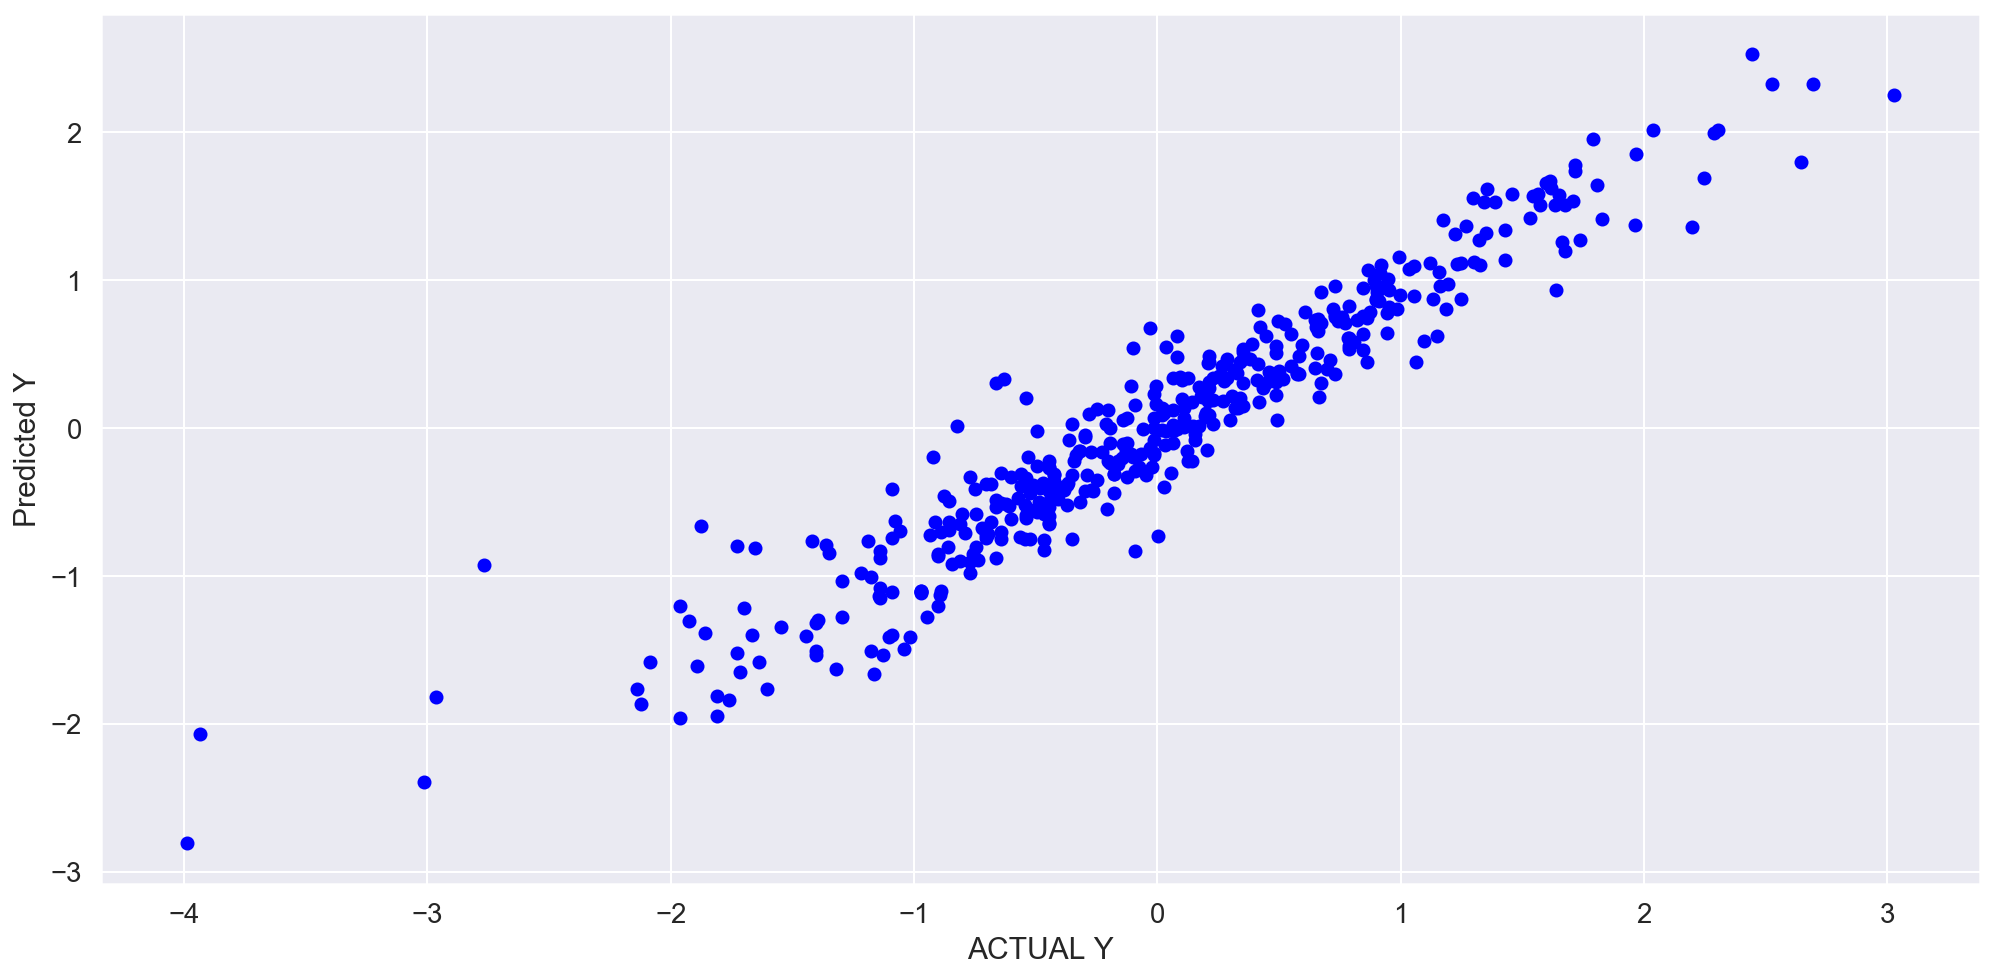

In [54]:
# PREDICTED VALUE VISUALIZATION

plt.figure(figsize=(15,8))
plt.scatter(y_test,cb_pred,c='blue')
plt.xlabel('ACTUAL Y')
plt.ylabel('Predicted Y')
plt.show()

As you can see, the difference between the actual value and the predicted value is not much.

# MODEL SUBMISSION

In [55]:
test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,4,8,4
1,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,4,8,4
2,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,4,8,4
3,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,4,8,4
4,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,4,8,4


In [56]:
predicted_price=CBmodel.predict(test)

In [57]:
sub['SalePtice']=predicted_price.reshape(-1,1)